<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/PyTorch/IntroDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning with PyTorch

In [1]:
%%bash
pip install --no-cache-dir -qU \
    torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 9.6 MB/s eta 0:00:00


## Introduction to PyTorch

### Tensors

In [2]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

# Create a tensor from numpy array
array = np.array([
    [1, 2, 3],
    [4, 5, 6]
], dtype=np.int32)
tensor = torch.tensor(array)
if torch.cuda.is_available():
    tensor = tensor.cuda()

# Display the tensor shape, data type, device
print("Tensor shape:", tensor.shape)
print("Tensor dtype:", tensor.dtype)
print("Tensor device:", tensor.device)

# Create two tensors from the arrays
array_a = np.array([
    [1, 1, 1],
    [2, 3, 4],
    [4, 5, 6]
], dtype=np.int32)
array_b = np.array([
    [7, 5, 4],
    [2, 2, 8],
    [6, 3, 8]
], dtype=np.int32)
tensor_a = torch.tensor(array_a)
tensor_b = torch.tensor(array_b)
if torch.cuda.is_available():
    tensor_a = tensor_a.cuda()
    tensor_b = tensor_b.cuda()

# Subtract tensor_b from tensor_a
tensor_c = tensor_a - tensor_b
# Multiply each element of tensor_a with each element of tensor_b
tensor_d = tensor_a * tensor_b
# Add tensor_c with tensor_d
tensor_e = tensor_c + tensor_d
print(tensor_e)

Tensor shape: torch.Size([2, 3])
Tensor dtype: torch.int32
Tensor device: cuda:0
tensor([[ 1,  1,  1],
        [ 4,  7, 28],
        [22, 17, 46]], device='cuda:0', dtype=torch.int32)


### Neural network

In [3]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

# Create input tensor with three features
input = np.array([
    [0.3471, 0.4547, -0.2356]
], dtype=np.float32)
input = torch.tensor(input)

# Define first linear layer
linear_layer = torch.nn.Linear(in_features=3, out_features=2)
print("Weight:", linear_layer.weight)
print("Bias:", linear_layer.bias)

if torch.cuda.is_available():
    input = input.cuda()
    linear_layer = linear_layer.cuda()

# Pass input through linear layer
output = linear_layer(input)
print("Output:", output)

Weight: Parameter containing:
tensor([[ 0.4414,  0.4792, -0.1353],
        [ 0.5304, -0.1265,  0.1165]], requires_grad=True)
Bias: Parameter containing:
tensor([-0.2811,  0.3391], requires_grad=True)
Output: tensor([[0.1219, 0.4382]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [4]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

input = np.array([
    [-0.0014, 0.4038, 1.0305, 0.7521, 0.7489, -0.3968, 0.0113, -1.3844, 0.8705, -0.9743]
], dtype=np.float32)
input = torch.tensor(input)

# Implement a small neural network with three linear layers
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=10, out_features=18),
    torch.nn.Linear(in_features=18, out_features=20),
    torch.nn.Linear(in_features=20, out_features=5)
)

if torch.cuda.is_available():
    input = input.cuda()
    model = model.cuda()

# Pass input_tensor to model to obtain output
output = model(input)
print("Output:", output)

Output: tensor([[-0.5441,  0.2479,  0.2832, -0.2926, -0.3359]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


### Activation functions

In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

# Create a score tensor
score = np.array([[0.8]], dtype=np.float32)
score = torch.tensor(score)
# Apply sigmoid on the score tensor
sigmoid = torch.nn.Sigmoid()

if torch.cuda.is_available():
    score = score.cuda()
    sigmoid = sigmoid.cuda()

probability = sigmoid(score)
print("Probability sigmoid:", probability)

Probability sigmoid: tensor([[0.6900]], device='cuda:0')


In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

# Create a score tensor
scores = np.array([
    [1.0, -6.0, 2.5, -0.3, 1.2, 0.8]
], dtype=np.float32)
scores = torch.tensor(scores)
# Apply softmax on the score tensor along the last dimension
softmax = torch.nn.Softmax(dim=-1)

if torch.cuda.is_available():
    scores = scores.cuda()
    softmax = softmax.cuda()

probabilities = softmax(scores)
print("Probabilities softmax:", probabilities)

Probabilities softmax: tensor([[1.2828e-01, 1.1698e-04, 5.7492e-01, 3.4961e-02, 1.5669e-01, 1.0503e-01]],
       device='cuda:0')


## Training Neural Network

### Forward pass

In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

# Create input data of shape 5x6
input = np.array([
    [-0.4421, 1.5207, 2.0607, -0.3647, 0.4691, 0.0946],
    [-0.9155, -0.0475, -1.3645, 0.6336, -0.19520, -0.3398],
    [0.7406, 1.6763, -0.8511, 0.2432, 0.1123, -0.0633],
    [-1.6630, -0.0718, -0.1285, 0.5396, -0.0288, -0.8622],
    [-0.7413, 1.7920, -0.0883, -0.6685, 0.4745, -0.4245]
], dtype=np.float32)
input = torch.tensor(input)

# Implement a small neural network for binary classification
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=6, out_features=4), # First linear layer
    torch.nn.Linear(in_features=4, out_features=1), # Second linear layer
    torch.nn.Sigmoid() # Sigmoid activation function
)

if torch.cuda.is_available():
    input = input.cuda()
    model = model.cuda()

# Pass input data through model
probability = model(input)
# Return probability
print("Probability shape:", probability.shape)
print("Probability:", probability)

Probability shape: torch.Size([5, 1])
Probability: tensor([[0.5257],
        [0.5925],
        [0.6498],
        [0.5418],
        [0.5037]], device='cuda:0', grad_fn=<SigmoidBackward0>)


In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

# Create input data of shape 5x6
input = np.array([
    [-0.4421, 1.5207, 2.0607, -0.3647, 0.4691, 0.0946],
    [-0.9155, -0.0475, -1.3645, 0.6336, -0.19520, -0.3398],
    [0.7406, 1.6763, -0.8511, 0.2432, 0.1123, -0.0633],
    [-1.6630, -0.0718, -0.1285, 0.5396, -0.0288, -0.8622],
    [-0.7413, 1.7920, -0.0883, -0.6685, 0.4745, -0.4245]
], dtype=np.float32)
input = torch.tensor(input)

# Specify model has three classes
n_classes = 3

# Implement a small neural network for multiclass classification model
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=6, out_features=4), # First linear layer
    torch.nn.Linear(in_features=4, out_features=n_classes), # Second linear layer
    torch.nn.Softmax(dim=-1) # Softmax activation
)

if torch.cuda.is_available():
    input = input.cuda()
    model = model.cuda()

# Pass input data through model
probabilities = model(input)
# Return probabilities
print("Probabilities shape:", probabilities.shape)
print("Probabilities:", probabilities)

Probabilities shape: torch.Size([5, 3])
Probabilities: tensor([[0.2277, 0.1865, 0.5858],
        [0.4008, 0.3053, 0.2938],
        [0.3929, 0.2855, 0.3216],
        [0.3409, 0.2591, 0.4000],
        [0.2445, 0.2576, 0.4979]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


### Loss functions

In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

y = torch.tensor([2])
scores = np.array([
    [0.1, 6.0, -2.0, 3.2]
], dtype=np.float32)
scores = torch.tensor(scores)
if torch.cuda.is_available():
    y = y.cuda()
    scores = scores.cuda()

# Create a one-hot encoded vector of the label y
one_hot_target = torch.nn.functional.one_hot(
    input=y, num_classes=scores.shape[1])
print("One hot encoding for 2nd class:", one_hot_target)

# Create the cross entropy loss function
criterion = torch.nn.CrossEntropyLoss()

# Calculate the cross entropy loss
loss = criterion(input=scores, target=one_hot_target.float())
print("Loss:", loss)

One hot encoding for 2nd class: tensor([[0, 0, 1, 0]], device='cuda:0')
Loss: tensor(8.0619, device='cuda:0')


### Update parameters

In [ ]:
import torch
torch.manual_seed(seed=42)

# Create the model and run a forward pass
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=16, out_features=8),
    torch.nn.Linear(in_features=8, out_features=4),
    torch.nn.Linear(in_features=4, out_features=2)
)
if torch.cuda.is_available():
    sample = sample.cuda()
    model = model.cuda()

pred = model(sample)
# Calculate the loss and compute the gradients
criterion = torch.nn.CrossEntropyLoss()
# Calculate the loss
loss = criterion(input=pred, target=target)
# Compute the gradients of the loss
loss.backward()

# Learning rate is typically small
lr = 0.001
# Update the weights of the first linear layer
weight = model[0].weight
weight_grad = model[0].weight.grad
weight = weight - lr * weight_grad
# Update the biases of the first linear layer
bias = model[0].bias
bias_grad = model[0].bias.grad
bias = bias - lr * bias_grad

# Create the optimizer
optimizer = torch.optim.SGD(
    params=model.parameters(), lr=0.001)
# Update the model's parameters using the optimizer
optimizer.step()

### Training loop

In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

y = np.array(1, dtype=np.float32)
y_hat = np.array(10, dtype=np.float32)
# Calculate the MSELoss using Numpy
mse_numpy = np.mean((y_hat - y)**2)
print("MSE numpy:", mse_numpy)

y = torch.tensor(y)
y_hat = torch.tensor(y_hat)
if torch.cuda.is_available():
    y = y.cuda()
    y_hat = y_hat.cuda()

# Create the MSELoss function
criterion = torch.nn.MSELoss()
# Calculate the MSELoss using the created loss function
mse_pytorch = criterion(input=y_hat, target=y)
print("MSE pytorch:", mse_pytorch)

MSE numpy: 81.0
MSE pytorch: tensor(81., device='cuda:0')


In [ ]:
import torch
torch.manual_seed(seed=42)

# Create the dataset and the dataloader
dataset = torch.utils.data.TensorDataset(
    torch.tensor(features).float(), torch.tensor(target).float()
)
dataloader = torch.utils.data.DataLoader(
    dataset=dataset, batch_size=4, shuffle=True
)
# Create the model
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=2),
    torch.nn.Linear(in_features=2, out_features=1)
)
if torch.cuda.is_available():
    model = model.cuda()

# Create the loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(
    params=model.parameters(), lr=0.001
)
# Loop over the number of epochs and then the dataloader
for epoch in range(num_epochs):
    for data in dataloader:
        # Set the gradients to zero
        optimizer.zero_grad()
        # Get feature and target from the dataloader
        feature, target = data
        if torch.cuda.is_available():
            feature = feature.cuda()
            target = target.cuda()
        # Run a forward pass
        pred = model(feature)
        # Compute loss and gradients
        loss = criterion(input=pred, target=target)
        loss.backward()
        # Update the parameters
        optimizer.step()

## Hyperparameters

### Activation functions

In [ ]:
import torch
torch.manual_seed(seed=42)

# Apply leaky ReLU function on x, and calculate gradients
x = torch.tensor(-3.0, dtype=torch.float32,
    requires_grad=True)
# Create a leakly ReLU function with PyTorch
leaky_relu = torch.nn.LeakyReLU(
    negative_slope=0.05)

y = leaky_relu(x)
y.backward()
# Print the gradient of the leaky ReLU function for x
print("Gradient:", x.grad)

Gradient: tensor(0.0500)


### Number of parameters

In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

def calculate_capacity(model):
    total = 0
    # Calculate the number of parameters in the model
    for p in model.parameters():
        total += p.numel()
    return total

input = np.array([
    [3, 4, 6, 2, 3, 6, 8, 9]
], dtype=np.float32)
input = torch.tensor(input)
# Create a neural network
n_features = 8
n_classes = 2
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=n_features, out_features=8),
    torch.nn.Linear(in_features=8, out_features=6),
    torch.nn.Linear(in_features=6, out_features=4),
    torch.nn.Linear(in_features=4, out_features=n_classes)
)
if torch.cuda.is_available():
    input = input.cuda()
    model = model.cuda()

print("Total parameters:", calculate_capacity(model))

output = model(input)
print("Output:", output)

Total parameters: 164
Output: tensor([[-0.0624, -0.5327]], device='cuda:0', grad_fn=<AddmmBackward0>)


### Layer initialization & transfer learning

In [ ]:
import torch
torch.manual_seed(seed=42)

layer0 = torch.nn.Linear(in_features=16, out_features=32)
layer1 = torch.nn.Linear(in_features=32, out_features=64)

# Use uniform initialization for layer0 and layer1 weights
torch.nn.init.uniform_(layer0.weight)
torch.nn.init.uniform_(layer1.weight)

model = torch.nn.Sequential(layer0, layer1)

if torch.cuda.is_available():
    model = model.cuda()

print("Model layer1 min weight:", model[1].weight.min())
print("Model layer1 max weight:", model[1].weight.max())

Model layer1 min weight: tensor(0.0010, device='cuda:0', grad_fn=<MinBackward1>)
Model layer1 max weight: tensor(0.9985, device='cuda:0', grad_fn=<MaxBackward1>)


In [ ]:
import torch
torch.manual_seed(seed=42)

model = torch.nn.Sequential(
    torch.nn.Linear(in_features=64, out_features=128),
    torch.nn.Linear(in_features=128, out_features=256)
)
if torch.cuda.is_available():
    model = model.cuda()

for name, param in model.named_parameters():
    # Check if the parameters belong to the first layer
    if name=='0.weight' or name=='0.bias':
        # Freeze the parameters
        param.requires_grad = False
    # Check if the parameters belong to the second layer
    if name=='1.weight' or name=='1.bias':
        # Freeze the parameters
        param.requires_grad = False

torch.save(obj=model, f='model.pth')

model = torch.load(f='model.pth')
print("model:", model)

model: Sequential(
  (0): Linear(in_features=64, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
)


## Evaluating Models

### TensorDataset

In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

features = np.array(np.random.rand(12, 8), dtype=np.float32)
target = np.array(np.random.rand(12, 1), dtype=np.float32)

# Convert arrays to PyTorch tensors
features = torch.tensor(features)
target = torch.tensor(target)
if torch.cuda.is_available():
    features = features.cuda()
    target = target.cuda()

# Create a TensorDataset from two tensors
dataset = torch.utils.data.TensorDataset(features, target)
# Access an individual sample
sample = dataset[-1]
input_sample, label_sample = sample
print("Input sample:", input_sample)
print("Label sample:", label_sample)

# Create a DataLoader
dataloader = torch.utils.data.DataLoader(
    dataset=dataset, batch_size=2, shuffle=True
)
# Iterate over the dataloader
for batch_inputs, batch_labels in dataloader:
    print("Batch inputs:", batch_inputs)
    print("Batch labels:", batch_labels)

Input sample: tensor([0.8872, 0.4722, 0.1196, 0.7132, 0.7608, 0.5613, 0.7710, 0.4938],
       device='cuda:0')
Label sample: tensor([0.7556], device='cuda:0')
Batch inputs: tensor([[0.0651, 0.9489, 0.9656, 0.8084, 0.3046, 0.0977, 0.6842, 0.4402],
        [0.3042, 0.5248, 0.4319, 0.2912, 0.6119, 0.1395, 0.2921, 0.3664]],
       device='cuda:0')
Batch labels: tensor([[0.0314],
        [0.0254]], device='cuda:0')
Batch inputs: tensor([[0.4561, 0.7852, 0.1997, 0.5142, 0.5924, 0.0465, 0.6075, 0.1705],
        [0.3745, 0.9507, 0.7320, 0.5987, 0.1560, 0.1560, 0.0581, 0.8662]],
       device='cuda:0')
Batch labels: tensor([[0.1079],
        [0.5227]], device='cuda:0')
Batch inputs: tensor([[0.5467, 0.1849, 0.9696, 0.7751, 0.9395, 0.8948, 0.5979, 0.9219],
        [0.0885, 0.1960, 0.0452, 0.3253, 0.3887, 0.2713, 0.8287, 0.3568]],
       device='cuda:0')
Batch labels: tensor([[0.3144],
        [0.5086]], device='cuda:0')
Batch inputs: tensor([[0.6011, 0.7081, 0.0206, 0.9699, 0.8324, 0.2123, 0.181

In [5]:
import os
import pandas as pd
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

os.makedirs('data', exist_ok=True)
dataframe = pd.read_csv('./data/water_potability.csv')
# Define input features
features = dataframe[['ph', 'Sulfate', 'Conductivity', 'Organic_carbon']]
features = np.array(features, dtype=np.float32)
# Define target features (ground truth)
target = dataframe['Potability']
target = np.array(target, dtype=np.float32)

# Load the different columns into two PyTorch tensors
features = torch.tensor(features)
target = torch.tensor(target)
if torch.cuda.is_available():
    features = features.cuda()
    target = target.cuda()

# Instantiate dataset class
dataset = torch.utils.data.TensorDataset(features, target)
print("Dataset:", dataset[-1])

# Create a dataloader using the above dataset
dataloader = torch.utils.data.DataLoader(
    dataset=dataset, batch_size=2, shuffle=True
)
x, y = next(iter(dataloader))
print("X:", x, "\ny:", y)

# Create a model using the nn.Sequential API
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=2),
    torch.nn.Linear(in_features=2, out_features=1),
    torch.nn.Sigmoid()
)
if torch.cuda.is_available():
    model = model.cuda()

proba = model(features)
print("Probability:", proba)

Dataset: (tensor([0.3224, 0.6560, 0.5887, 0.4714], device='cuda:0'), tensor(1., device='cuda:0'))
X: tensor([[0.4755, 0.7001, 0.3965, 0.5092],
        [0.5497, 0.3670, 0.5538, 0.6479]], device='cuda:0') 
y: tensor([0., 1.], device='cuda:0')
Probability: tensor([[0.6648],
        [0.6542],
        [0.6631],
        ...,
        [0.6503],
        [0.6594],
        [0.6577]], device='cuda:0', grad_fn=<SigmoidBackward0>)


### Evaluation

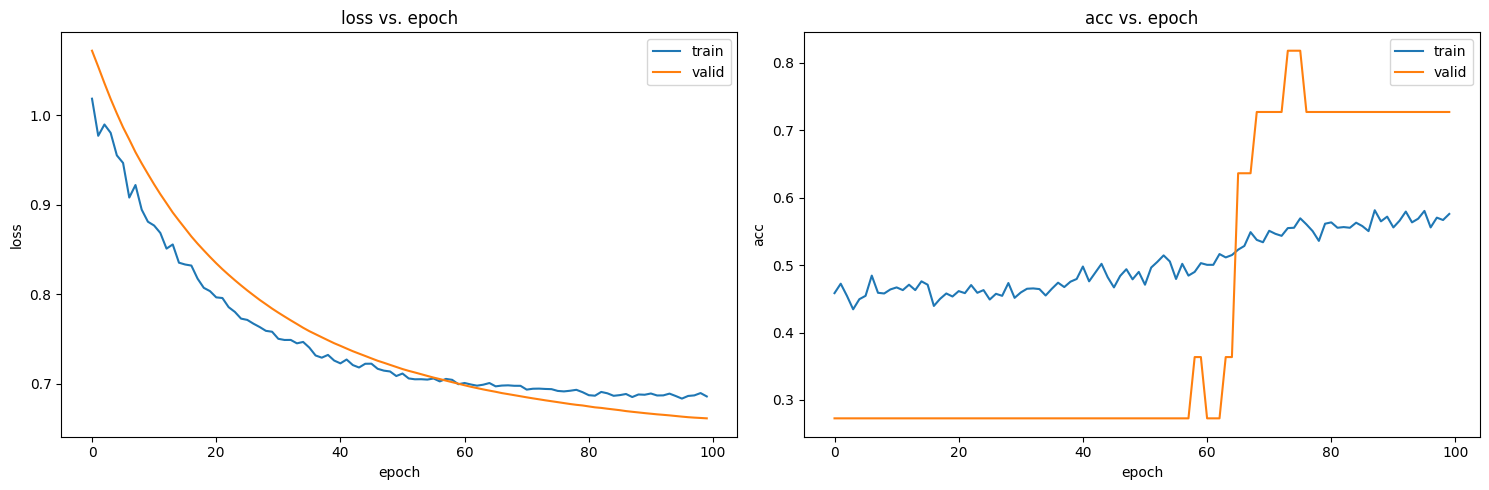

In [18]:
import os
import numpy as np
np.random.seed(seed=42)
import pandas as pd
import torch
torch.manual_seed(seed=42)
import torchmetrics
%matplotlib Inline
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs('data', exist_ok=True)
df = pd.read_csv('./data/water_potability.csv')
features = df[['ph', 'Sulfate', 'Conductivity', 'Organic_carbon']]
features = np.array(features, dtype=np.float32)
features = torch.tensor(features)
target = df['Potability']
target = np.array(target, dtype=np.float32)
target = torch.tensor(target).view(-1, 1)
if torch.cuda.is_available():
    features = features.cuda()
    target = target.cuda()

dataset = torch.utils.data.TensorDataset(features, target)
indices = np.arange(target.shape[0])
np.random.shuffle(indices)
trainloader = torch.utils.data.DataLoader(
    dataset=dataset, batch_size=64, shuffle=False,
    sampler=torch.utils.data.SubsetRandomSampler(indices=indices[:2000])
)
validloader = torch.utils.data.DataLoader(
    dataset=dataset, batch_size=64, shuffle=False,
    sampler=torch.utils.data.SubsetRandomSampler(indices=indices[2000:])
)

model = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=2),
    torch.nn.Dropout(p=0.3),
    torch.nn.Linear(in_features=2, out_features=1),
    torch.nn.Dropout(p=0.3),
    torch.nn.Sigmoid()
)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)
# Create accuracy metric using torch metrics
acc = torchmetrics.Accuracy(task='binary')
if torch.cuda.is_available():
    model = model.cuda()
    acc = acc.cuda()

history = {
    'train_loss':[],
    'train_acc':[],
    'valid_loss':[],
    'valid_acc':[]
}
for epoch in range(100):
    train_loss = 0.0
    for data in trainloader:
        # Run the forward pass
        optimizer.zero_grad()
        features, target = data
        preds = model(features)
        # Calculate accuracy over the batch
        acc(preds=preds, target=target)
        # Calculate the loss
        loss = criterion(input=preds, target=target)
        # Calculate the gradients
        loss.backward()
        optimizer.step()
        # Calculate and sum the loss
        train_loss += loss.item()
    train_loss = train_loss / len(trainloader)
    # Calculate accuracy over the whole epoch
    train_acc = acc.compute().item()
    # Reset the metric
    acc.reset()

    valid_loss = 0.0
    # Set the model in evaluation mode
    model.eval()
    # Speed up the forward pass
    with torch.no_grad():
        for data in validloader:
            # Run the forward pass
            features, target = data
            preds = model(features)
            # Calculate accuracy over the batch
            acc(preds=preds, target=target)
            # Calculate the loss
            loss = criterion(input=preds, target=target)
            # Sum the current loss to the validation_loss variable
            valid_loss += loss.item()
    # Calculate the mean loss value
    valid_loss = valid_loss / len(validloader)
    # Calculate accuracy over the whole epoch
    valid_acc = acc.compute().item()
    # Reset the metric
    acc.reset()
    # Set the model back to training model
    model.train()

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['valid_loss'].append(valid_loss)
    history['valid_acc'].append(valid_acc)

df_history = pd.DataFrame(history)
metrics = ['loss', 'acc']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, metrics):
    sns.lineplot(ax=ax, data=df_history, label='train',
        x=df_history.index, y=f'train_{metric}')
    try:
        sns.lineplot(ax=ax, data=df_history, label='valid',
            x=df_history.index, y=f'valid_{metric}')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel(xlabel='epoch')
    ax.set_ylabel(ylabel=f'{metric}')
    ax.set_title(label=f'{metric} vs. epoch')
fig.tight_layout()
plt.show()

In [ ]:
import torch
torch.manual_seed(seed=42)
import torchmetrics

# Create accuracy metric using torch metrics
metric = torchmetrics.Accuracy(
    task='multiclass', num_classes=3
)
for data in dataloader:
    features, target = data
    preds = model(features)
    # Calculate accuracy over the batch
    metric(
        preds=preds.softmax(dim=-1),
        target=target.argmax(dim=-1)
    )
# Calculate accuracy over the whole epoch
acc = metric.compute()
print(f"Accuracy on all data: {acc}")
# Reset the metric for the next epoch (training or validataion)
metric.reset()

### Overfitting

In [ ]:
import torch

model = torch.nn.Sequential(
    torch.nn.Linear(in_features=8, out_features=4),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.5)
)
features = torch.randn(size=(1, 8))

if torch.cuda.is_available():
    model = model.cuda()
    features = features.cuda()

print(model(features))

optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=1e-3, weight_decay=1e-4)

tensor([[0.0000, 0.0000, 0.0000, 0.0626]], device='cuda:0',
       grad_fn=<NativeDropoutBackward0>)


In [ ]:
import torch

# Create a small neural network, set the dropout probability to 0.8
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=3072, out_features=16),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.8))
)

if torch.cuda.is_available():
    model = model.cuda()
    input_tensor = input_tensor.cuda()

model(input_tensor)

### Hyperparameter search

In [ ]:
import numpy as np
import torch

if torch.cuda.is_available():
    model = model.cuda()

criterion = torch.nn.CrossEntropyLoss()
values = []
for idx in range(10):
    # Randomly sample a learning rate factor between 0.01 and 0.0001
    factor = np.random.uniform(2, 4)
    lr = 10 ** -factor
    # Randomly sample a momentum between 0.85 and 0.99
    momentum = np.random.uniform(0.85, 0.99)
    values.append((lr, momentum))

optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=1e-3, weight_decay=1e-4
)

features, labels = next(iter(trainloader))
for i in range(1e3):
    outputs = model(features)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()